In [3]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns; sns.set_theme()
import plotly.figure_factory as ff
from itertools import combinations
from collections import Counter
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

<IPython.core.display.Javascript object>

In [4]:
Customers_data = pd.read_excel('https://github.com/doke93/Data-Analysis-Project-Ineuron/files/8985052/Database.xlsx',
                              'Customers',
                              dtype={'CustomerKey':str},
                              parse_dates=['BirthDate','DateFirstPurchase']
                              )

In [5]:
Product_data = pd.read_excel('https://github.com/doke93/Data-Analysis-Project-Ineuron/files/8985052/Database.xlsx',
                              'Product',
                              dtype={'ProductKey':str},
                              parse_dates=['StartDate']
                              )

In [6]:
Sales_data = pd.read_excel('https://github.com/doke93/Data-Analysis-Project-Ineuron/files/8985052/Database.xlsx',
                              'Sales',
                              dtype={'ProductKey':str,
                                     'CustomerKey':str,
                                     'PromotionKey':str,
                                     'SalesTerritoryKey':str},
                              parse_dates=['OrderDate', 'ShipDate']
                              )
Sales_data['DateKey'] = Sales_data['OrderDate'].astype(str)

In [7]:
Territory_data = pd.read_excel('https://github.com/doke93/Data-Analysis-Project-Ineuron/files/8985052/Database.xlsx',
                              'Territory',
                              dtype={'SalesTerritoryKey':str}
                              )

In [8]:
temp_data = pd.merge(Sales_data, Product_data, on='ProductKey', how='inner')
df = pd.merge(temp_data, Customers_data, on='CustomerKey', how='inner')
df = pd.merge(df, Territory_data, on='SalesTerritoryKey', how='inner')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58189 entries, 0 to 58188
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ProductKey            58189 non-null  object        
 1   OrderDate             58189 non-null  datetime64[ns]
 2   ShipDate              58189 non-null  datetime64[ns]
 3   CustomerKey           58189 non-null  object        
 4   PromotionKey          58189 non-null  object        
 5   SalesTerritoryKey     58189 non-null  object        
 6   SalesOrderNumber      58189 non-null  object        
 7   SalesOrderLineNumber  58189 non-null  int64         
 8   OrderQuantity         58189 non-null  int64         
 9   UnitPrice             58189 non-null  float64       
 10  TotalProductCost      58189 non-null  float64       
 11  SalesAmount           58189 non-null  float64       
 12  TaxAmt                58189 non-null  float64       
 13  DateKey         

In [10]:
# Check shape of the data after merging
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]} \n")

Number of Rows: 58189
Number of Columns: 46 



In [11]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
OrderDate,58189,2016-06-03 03:56:09.605939200,2014-01-01 00:00:00,2016-04-01 00:00:00,2016-07-07 00:00:00,2016-10-10 00:00:00,2016-12-30 00:00:00,NaN
ShipDate,58189,2016-06-10 04:03:24.657237760,2014-01-08 00:00:00,2016-04-08 00:00:00,2016-07-14 00:00:00,2016-10-17 00:00:00,2017-01-07 00:00:00,NaN
SalesOrderLineNumber,58189.0,1.887453,1.0,1.0,2.0,2.0,8.0,1.018829
OrderQuantity,58189.0,1.569386,1.0,1.0,1.0,2.0,4.0,1.047532
UnitPrice,58189.0,413.888218,0.5725,4.99,24.49,269.995,3578.27,833.052938
TotalProductCost,58189.0,296.539185,0.8565,3.3623,12.1924,343.6496,2171.2942,560.171436
SalesAmount,58189.0,503.66627,2.29,8.99,32.6,539.99,3578.27,941.462817
TaxAmt,58189.0,40.293303,0.1832,0.7192,2.608,43.1992,286.2616,75.317027
StandardCost,58189.0,296.539185,0.8565,3.3623,12.1924,343.6496,2171.2942,560.171436
ListPrice,58189.0,503.66627,2.29,8.99,32.6,539.99,3578.27,941.462817


In [12]:
# Check for duplicate data
df.duplicated().sum()

np.int64(0)

In [13]:
def missing_pct(df):
    # Calculate missing value and their percentage for each column
    missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_value_count'
                    }
                )
    # Sort the data frame
    #df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final

In [14]:
# Applying the custom function
missing_pct(df)

,Column,Missing_value_count,Missing_Percentage (%)
18,Color,27442,47.16
0,ProductKey,0,0.00
2,ShipDate,0,0.00
3,CustomerKey,0,0.00
4,PromotionKey,0,0.00
1,OrderDate,0,0.00
6,SalesOrderNumber,0,0.00
7,SalesOrderLineNumber,0,0.00
8,OrderQuantity,0,0.00
9,UnitPrice,0,0.00


In [15]:
#  Drop columns with nan values
df= df.dropna(axis=1)

In [16]:
# Extracting Year from OrderDate
df['sale_year'] = df['OrderDate'].dt.year

# Extracting Month from OrderDate
df['sale_month'] = df['OrderDate'].dt.month

# Extracting day from OrderDate
df['sale_day'] = df['OrderDate'].dt.day

# Extracting dayofweek from OrderDate
df['sale_week'] = df['OrderDate'].dt.dayofweek

# Extracting day_name from OrderDate
df['sale_day_name'] = df['OrderDate'].dt.day_name()

# Extracting Month Year from OrderDate
df['year_month'] = df['OrderDate'].apply(lambda x:x.strftime('%Y-%m'))

# Calculate Total Invoice Amount
df['total_Invoice_amount'] = df['SalesAmount'] + df['TaxAmt']

# Considering only salesamount and total_sales_amount to calculate profit 
df['profit'] = (df['UnitPrice']*df['OrderQuantity']) - df['TotalProductCost']

# Removing extra character from the string
df['ProductName'] = df['ProductName'].str.replace(',','-')

# Calculate Age
df['Age'] = df['OrderDate'].dt.year - df['BirthDate'].dt.year

In [17]:
df['Category'].unique().tolist()

['Bikes', 'Accessories', 'Clothing']

In [18]:
df['SubCategory'].unique().tolist()

['Road Bikes',
 'Mountain Bikes',
 'Bottles and Cages',
 'Touring Bikes',
 'Helmets',
 'Tires and Tubes',
 'Bike Stands',
 'Jerseys',
 'Gloves',
 'Fenders',
 'Caps',
 'Socks',
 'Hydration Packs',
 'Vests',
 'Cleaners',
 'Bike Racks',
 'Shorts']

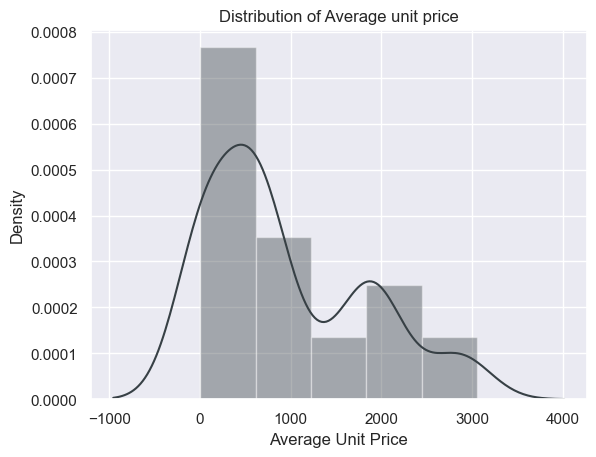

In [19]:
Avg_unit_price = df.groupby(['ProductKey'])['UnitPrice'].mean()
ax = sns.distplot(Avg_unit_price, kde=True, hist=True, color='#374045')
ax.set(title='Distribution of Average unit price',
       xlabel='Average Unit Price');

In [20]:
n_orders = df.groupby(['CustomerKey'])['SalesOrderNumber'].nunique()
multi_orders_perc = np.sum(n_orders > 1)/df['CustomerKey'].nunique()
print(f"{100*multi_orders_perc:.2f}% of customers ordered more than once.")

36.97% of customers ordered more than once.


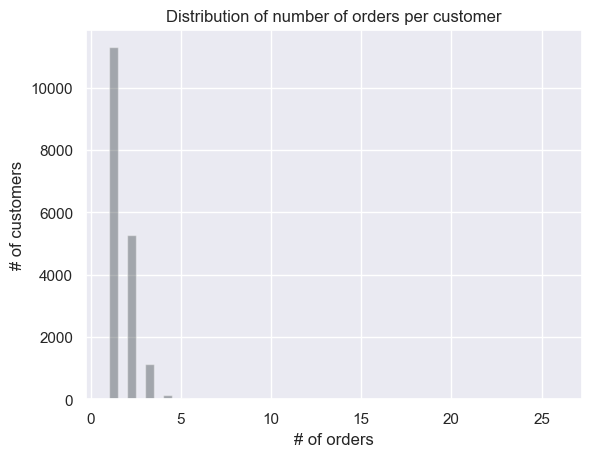

In [21]:
ax = sns.distplot(n_orders, kde=False, color='#374045')
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders',
       ylabel='# of customers');


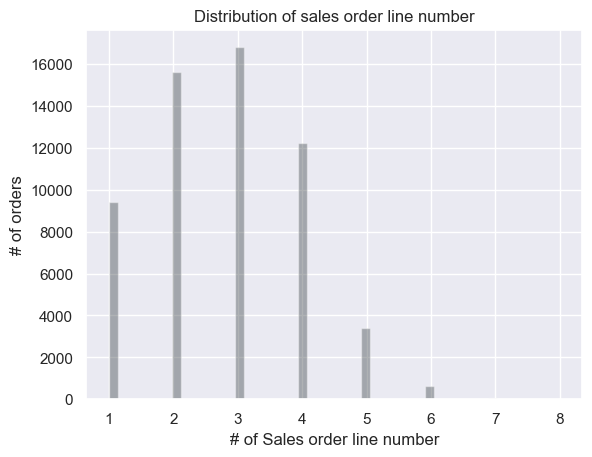

In [22]:
n_salesordernumber = df.groupby(['SalesOrderNumber'])['SalesOrderLineNumber'].transform('max')
ax = sns.distplot(n_salesordernumber, kde=False, color='#374045')
ax.set(title='Distribution of sales order line number',
       xlabel='# of Sales order line number',
       ylabel='# of orders');